# Breast Cancer Prediction 

### Wisconsin Diagnostic Breast Cancer Dataset is used for the problem, and basic supervised learning algorithms are used for prediction. 


In this cell the dataset is loaded using numpy and pandas. First the pandas import the dataframe and then data is 
converted to nd array, as many operations in scikit learn are compatible with nd array.

The data is then further split into training, testing and validation using train_test_split function of scikit learn
The split between the training testing and validation is random and is in the percent division 60%, 20%, and 20%  
respectively.

In [19]:
#Breast cancer classification problem



%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, preprocessing, metrics, tree, linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
import math as m
import warnings
warnings.filterwarnings('ignore')

# import  data from the file wdbc.data and give proper headers


df = pd.read_csv('wdbc.data', delimiter = ',', names = ['id', 'diagnosis', 'M radius', 'M texture', 'M perimeter', 
                                                        'M area', ' M smoothness', 'M compactness', 'M concavity', 
                                                        'M concave points', 'M symmetry', 'M fractal',
                                                      'SE radius', 'SE texture', 'SE perimeter', 'SE area',
                                                        'SE smoothness', 'SE compactness', 'SE concavity', 
                                                        'SE concave points', 'SE symmetry',  'SE fractal',
                                                       'W radius', 'W texture', 'W perimeter', 'W area',
                                                        'W smoothness', 'W compactness', 'W concavity',
                                                        'W concave points', 'W symmetry', 'W fractal'])
                     
print(df)

df_array = df.to_numpy()
training_cut = m.floor(df.shape[0] * 0.65)
validation_cut = training_cut + m.floor(df.shape[0] * 0.15)

df_raw_X = df_array[:, 2:].copy()
df_raw_Y = df_array[:, 1:2].ravel().copy()

df_training_X, df_test_X, df_training_Y, df_test_Y = train_test_split(df_raw_X, df_raw_Y, test_size=0.20,
                                                                      random_state = 4)

df_training_n_X, df_validation_X, df_training_n_Y, df_validation_Y = train_test_split(df_training_X,
                                                                                      df_training_Y, test_size=0.20,
                                                                                      random_state = 4)


print(df_training_X.shape)
print(df_training_n_X.shape)
print(df_validation_X.shape)
print(df_test_X.shape)


           id diagnosis  M radius  M texture  M perimeter  M area  \
0      842302         M     17.99      10.38       122.80  1001.0   
1      842517         M     20.57      17.77       132.90  1326.0   
2    84300903         M     19.69      21.25       130.00  1203.0   
3    84348301         M     11.42      20.38        77.58   386.1   
4    84358402         M     20.29      14.34       135.10  1297.0   
..        ...       ...       ...        ...          ...     ...   
564    926424         M     21.56      22.39       142.00  1479.0   
565    926682         M     20.13      28.25       131.20  1261.0   
566    926954         M     16.60      28.08       108.30   858.1   
567    927241         M     20.60      29.33       140.10  1265.0   
568     92751         B      7.76      24.54        47.92   181.0   

      M smoothness  M compactness  M concavity  M concave points  ...  \
0          0.11840        0.27760      0.30010           0.14710  ...   
1          0.08474       

# Benchmarking 
This benchmarking is usually based on the majority rule but here the majority is of B class, so if we calculate accuracy and F-score we will get 0, so a better benchmark would be when our model predicts all cases as 'M'. In the given scenario we want to predict the 'M' class with the least error, because the cost of predicting a false 'B' is higher than a false 'M', so keeping the focus on 'M' class, we want to maximize the recall of 'M'.

In [2]:
unique, counts = np.unique(df_training_Y, return_counts=True)

result = np.column_stack((unique, counts)) 
print(result)

benchmark =  np.full(df_test_Y.shape,  'M')

print("Accuracy: ",  metrics.accuracy_score(df_test_Y, benchmark))
print("F score: ", metrics.f1_score(df_test_Y, benchmark, pos_label = 'M'))
print("Recall score: ", metrics.recall_score(df_test_Y, benchmark, pos_label = 'M'))
print("Precision score: ", metrics.precision_score(df_test_Y, benchmark, pos_label = 'M'))




[['B' 277]
 ['M' 178]]
Accuracy:  0.2982456140350877
F score:  0.45945945945945943
Recall score:  1.0
Precision score:  0.2982456140350877


# Measurement Selection

In [ ]:
There are multiple parameters to decide for the best model, such as F score, accuracy, Recall and prediciton.
In this context, or in this classification problem, the more costly classification would be if an actual 'M' 
class is predicted as 'B'. So in order to reduce this cost, we need to maximize the Recall for 'M' class.
So we will finalize the model, which will have maximum Recall.


# KNN Classifier

In [ ]:
Now we start our classification with KNN, we will first normalize the training and validation data.
Then we will check the F measure, recall for different values of n_neighbors from 3 to 50, based on that
we will conclude for what value of n our model has highest Recall.


In [4]:
#normalization of the data set
min_max_scaler = preprocessing.MinMaxScaler()
normalized_df_training_X = min_max_scaler.fit_transform(df_training_n_X)

normalized_df_val_X = min_max_scaler.transform(df_validation_X)

print("normalized training data set X", normalized_df_training_X)
print(df_training_X.shape[0])
print(df_validation_X.shape[0])
print(df_test_X.shape[0])



[[0.37905249 0.64273859 0.35761178 ... 0.09986221 0.         0.        ]
 [0.         0.15435685 0.         ... 0.         0.32478023 0.2543618 ]
 [0.30380046 0.44854772 0.30993021 ... 0.70651051 0.47992397 0.36639118]
 ...
 [0.63841166 0.45477178 0.62822196 ... 0.5556321  0.39320504 0.05785124]
 [0.22239576 0.26804979 0.21905881 ... 0.33809852 0.29436921 0.16528926]
 [0.43348005 0.21369295 0.41814664 ... 0.38890803 0.28819197 0.09891119]]
455
91
114


(47,)
(47,)


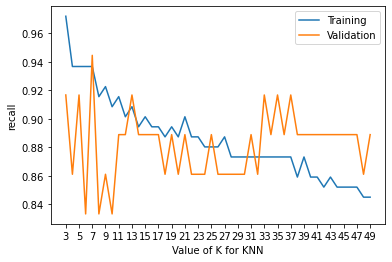

Mean Recall at validation data in KNN 0.8817966903073283
Mean F score at Validation data in KNN 0.9291899760970034
Mean accuracy at Validation data in KNN 0.9469254150105211
No of neighbours for max recall score 7


In [40]:
f1_score_train_array =  np.array([])
f1_score_val_array =  np.array([])

recall_train_array =  np.array([])
recall_val_array =  np.array([])

accuracy_train_array =  np.array([])
accuracy_val_array =  np.array([])

# create the model
# KNeighborsClassifier is implementing the k-nearest neighbors vote


## Train the model (fit the data)
n_range = range(3, 50)
for n_neighbors in range(3, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors)

    clf.fit(normalized_df_training_X, df_training_n_Y)
    z_train = clf.predict(normalized_df_training_X)
    z_val = clf.predict(normalized_df_val_X)
    
    f1_score_train_array = np.append(f1_score_train_array, metrics.f1_score(df_training_n_Y, z_train, pos_label = 'M'))
    f1_score_val_array = np.append(f1_score_val_array, metrics.f1_score(df_validation_Y, z_val, pos_label = 'M'))
    
    accuracy_train_array = np.append(accuracy_train_array, metrics.accuracy_score(df_training_n_Y, z_train))
    accuracy_val_array = np.append(accuracy_val_array, metrics.accuracy_score(df_validation_Y, z_val))
    
    #checking recall
    recall_train_array = np.append(recall_train_array, metrics.recall_score(df_training_n_Y, z_train, pos_label = 'M'))
    recall_val_array = np.append(recall_val_array, metrics.recall_score(df_validation_Y, z_val, pos_label = 'M'))

    
print(f1_score_train_array.shape)
print(f1_score_val_array.shape)

plt.plot(n_range, recall_train_array, label = "Training")
plt.plot(n_range, recall_val_array, label = "Validation")
plt.xlabel('Value of K for KNN')
plt.xticks(range(3, 50, 2))
plt.ylabel('recall')
plt.legend()
plt.show()

print("Mean Recall at validation data in KNN" , recall_val_array.mean())
print("Mean F score at Validation data in KNN", f1_score_val_array.mean())
print("Mean accuracy at Validation data in KNN", accuracy_val_array.mean())

n_max = np.where(recall_val_array==recall_val_array.max())[0][0] + 3

print("No of neighbours for max recall score", n_max)



In [26]:
#Final model on training and validation for n = 7

clf = neighbors.KNeighborsClassifier(n_max)

clf.fit(normalized_df_training_X, df_training_n_Y)
z_val = clf.predict(normalized_df_val_X)
print("recall final from KNN", metrics.recall_score(df_validation_Y, z_val, pos_label = 'M'))

print("f score final from KNN", metrics.f1_score(df_validation_Y, z_val, pos_label = 'M'))


print("accuracy final from KNN", metrics.accuracy_score(df_validation_Y, z_val))


print("Confusion Matrix", metrics.confusion_matrix(df_validation_Y, z_val, labels = ['M', 'B']))


recall final from KNN 0.9444444444444444
f score final from KNN 0.9714285714285714
accuracy final from KNN 0.978021978021978
Confusion Matrix [[34  2]
 [ 0 55]]


# Decision Tree Classifier

In [ ]:
In Decision tree, our Hyper parameter will be max depth of the tree and we will check for 
which max depth, the tree is giving best recall, without overfitting.
We are trying to fit the tree for depth ranging from 1 to 20

Mean F score at validation data in Decision Tree  0.9140123034859876
Mean accuracy at validation data in Decision Tree  0.9340659340659341
Mean recall at validation data in Decision Tree  0.8859649122807017
max depth of tree for max F score 2


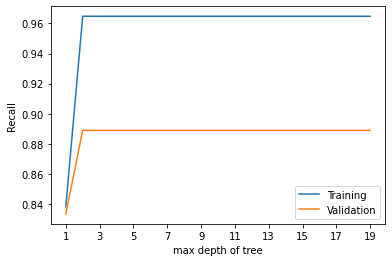

In [14]:
f1_decision_tree_val =  np.array([])
f1_decision_tree_train = np.array([])

accuracy_val = np.array([])
accuracy_train = np.array([])

recall_val = np.array([])
recall_train = np.array([])
#implementing decision tree on training and validation

for depth in range(1, 20):
    clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=depth, min_impurity_decrease = 0.05)
    
    clf.fit(df_training_n_X, df_training_n_Y)
    
    pred_train = clf.predict(df_training_n_X)
    pred_val = clf.predict(df_validation_X)
    
    f1_decision_tree_train = np.append(f1_decision_tree_train, metrics.f1_score(df_training_n_Y, pred_train, pos_label = 'M'))
    f1_decision_tree_val = np.append(f1_decision_tree_val, metrics.f1_score(df_validation_Y, pred_val, pos_label = 'M'))

    accuracy_train = np.append(accuracy_train, metrics.accuracy_score(df_training_n_Y, pred_train))
    accuracy_val = np.append(accuracy_val, metrics.accuracy_score(df_validation_Y, pred_val))
    
    recall_train = np.append(recall_train, metrics.recall_score(df_training_n_Y, pred_train, pos_label = 'M'))
    recall_val = np.append(recall_val, metrics.recall_score(df_validation_Y, pred_val, pos_label = 'M'))
    
#results    
max_depth_found = np.where(recall_val==recall_val.max())[0][0] + 1

print("Mean F score at validation data in Decision Tree " , f1_decision_tree_val.mean())
print("Mean accuracy at validation data in Decision Tree " , accuracy_val.mean())
print("Mean recall at validation data in Decision Tree " , recall_val.mean())

print("max depth of tree for max F score", max_depth_found )


plt.plot(range(1, 20), recall_train, label = "Training")
plt.plot(range(1,20), recall_val, label = "Validation")
plt.xlabel('max depth of tree')
plt.xticks(range(1, 20, 2))
plt.ylabel('Recall')
plt.legend()
plt.show()

Recall final from Decision tree 0.8888888888888888
Confusion Matrix [[32  4]
 [ 2 53]]


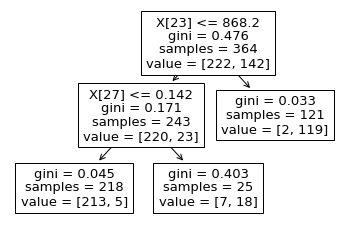

In [27]:
#final Decision Tree model on test and validation for depth at max recall


clf = tree.DecisionTreeClassifier(criterion="gini", max_depth = max_depth_found, min_impurity_decrease = 0.05)

clf.fit(df_training_n_X, df_training_n_Y )
tree_val_pred = clf.predict(df_validation_X)

recall_score_final =  metrics.recall_score(df_validation_Y, tree_val_pred, pos_label = 'M')
print("Recall final from Decision tree", recall_score_final)
tree.plot_tree(clf)
print("Confusion Matrix", metrics.confusion_matrix(df_validation_Y, tree_val_pred, labels = ['M', 'B']))

 # Logistic Regression


In [ ]:
Here, in Logistic our hyper paramter is the type of regularization 'p(in penalty)'. So,we evaluate our model
on Validation set for all three types of regularization.


In [65]:
# logistic regression on optimal c and training and validation set


for p in ('l1', 'l2', 'none'):
    clf = linear_model.LogisticRegression(penalty = p , solver = 'saga', max_iter = 10000)
    clf.fit(std_training_X, df_training_n_Y)
    pred_val = clf.predict(std_validation_X)

    print("Mean F score when penalty = ", p, ":", metrics.f1_score(df_validation_Y, pred_val, pos_label = 'M'))
    print("Mean accuracy when penalty = ", p, ":", metrics.accuracy_score(df_validation_Y, pred_val))
    print("Mean recall score when penalty =", p, ":", metrics.recall_score(df_validation_Y, pred_val, pos_label = 'M'))



Mean F score when penalty =  l1 : 0.9714285714285714
Mean accuracy when penalty =  l1 : 0.978021978021978
Mean recall score when penalty = l1 : 0.9444444444444444
Mean F score when penalty =  l2 : 0.9577464788732395
Mean accuracy when penalty =  l2 : 0.967032967032967
Mean recall score when penalty = l2 : 0.9444444444444444
Mean F score when penalty =  none : 0.927536231884058
Mean accuracy when penalty =  none : 0.945054945054945
Mean recall score when penalty = none : 0.8888888888888888


# Selected Model

KNN is so far the best model with highest recall and accuracy on validation set, with K being 7. So we are selecting KNN
as the best fit model. In this step we will evaluate KNN on the testing data set

In [63]:
#Final model on training and testing for n = 7

# 1. normalize the training and testing data

min_max_scaler = preprocessing.MinMaxScaler()
normalized_df_training_X = min_max_scaler.fit_transform(df_training_n_X)

normalized_df_test_X = min_max_scaler.transform(df_test_X)

clf = neighbors.KNeighborsClassifier(7)

clf.fit(normalized_df_training_X, df_training_n_Y)

pred_test = clf.predict(normalized_df_test_X)

print("recall final from KNN", metrics.recall_score(df_test_Y, pred_test, pos_label = 'M'))

print("f score final from KNN", metrics.f1_score(df_test_Y, pred_test, pos_label = 'M'))


print("accuracy final from KNN", metrics.accuracy_score(df_test_Y, pred_test))

print("precision final from KNN", metrics.precision_score(df_test_Y, pred_test, pos_label = 'M'))


print("Confusion Matrix", metrics.confusion_matrix(df_test_Y, pred_test, labels = ['M', 'B']))

recall final from KNN 0.9705882352941176
f score final from KNN 0.9565217391304348
accuracy final from KNN 0.9736842105263158
precision final from KNN 0.9428571428571428
Confusion Matrix [[33  1]
 [ 2 78]]
